In [ ]:



#import libraries
import numpy as np
import pandas as pd
import tensorflow as tf

In [ ]:

#importing dataset
dataset = pd.read_csv('/content/simplified_dataset.csv')

In [ ]:
#partial view of dataset from top
dataset.head()

,radius_mean,perimeter_mean,area_mean,concave points_mean,compactness_mean,concavity_mean,symmetry_mean,diagnosis
0,13.540,87.46,566.3,0.047810,0.08129,0.06664,0.1885,0
1,13.080,85.63,520.0,0.031100,0.12700,0.04568,0.1967,0
2,9.504,60.34,273.9,0.020760,0.06492,0.02956,0.1815,0
3,13.030,82.61,523.8,0.029230,0.03766,0.02562,0.1467,0
4,8.196,51.71,201.9,0.005917,0.05943,0.01588,0.1769,0


In [ ]:
#partial view of dataset from bottom
dataset.tail()

,radius_mean,perimeter_mean,area_mean,concave points_mean,compactness_mean,concavity_mean,symmetry_mean,diagnosis
1702,25.051301,164.595947,1479.654122,0.665088,0.904159,-0.138661,-0.934823,1
1703,25.618791,164.478590,1612.469769,0.052068,3.028695,2.167466,-0.130640,1
1704,24.267582,153.067353,1395.086101,0.121857,0.092320,0.664124,1.274247,1
1705,21.507654,128.969161,992.121395,-0.464384,0.978615,0.101723,1.545931,1
1706,23.741493,160.268395,1397.825917,-1.463056,2.273981,0.360278,0.024367,1


In [ ]:
#basic dataset information
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1707 entries, 0 to 1706
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   radius_mean          1707 non-null   float64
 1   perimeter_mean       1707 non-null   float64
 2   area_mean            1707 non-null   float64
 3   concave points_mean  1707 non-null   float64
 4   compactness_mean     1707 non-null   float64
 5   concavity_mean       1707 non-null   float64
 6   symmetry_mean        1707 non-null   float64
 7   diagnosis            1707 non-null   int64  
dtypes: float64(7), int64(1)
memory usage: 106.8 KB


In [ ]:
#dimention of the dataset
dataset.shape

(1707, 8)

In [ ]:

#basic statistics symmary
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
radius_mean,1707.0,15.685153,4.141541,6.981000,12.770000,14.715360,18.148302,31.985974
perimeter_mean,1707.0,102.338293,27.870323,43.790000,82.776758,95.248300,118.559141,210.419964
area_mean,1707.0,744.269766,357.352446,143.500000,512.073910,646.270887,880.468052,2635.306447
concave points_mean,1707.0,0.070527,0.789224,-3.134458,-0.241727,0.038067,0.377214,3.742178
compactness_mean,1707.0,0.108874,0.802414,-2.835169,-0.202028,0.094450,0.425137,3.142277
concavity_mean,1707.0,0.120859,0.809326,-3.121895,-0.147444,0.075564,0.450434,3.220939
symmetry_mean,1707.0,0.196364,0.821795,-3.274858,-0.068324,0.180900,0.540978,3.598207
diagnosis,1707.0,0.372583,0.483634,0.000000,0.000000,0.000000,1.000000,1.000000


                     radius_mean  perimeter_mean  area_mean  \
radius_mean             1.000000        0.979973   0.958005   
perimeter_mean          0.979973        1.000000   0.973771   
area_mean               0.958005        0.973771   1.000000   
concave points_mean     0.021571        0.026649   0.031006   
compactness_mean        0.037037        0.042682   0.035601   
concavity_mean          0.085151        0.092081   0.080360   
symmetry_mean          -0.007772       -0.001465  -0.007236   
diagnosis               0.737064        0.762673   0.697811   

                     concave points_mean  compactness_mean  concavity_mean  \
radius_mean                     0.021571          0.037037        0.085151   
perimeter_mean                  0.026649          0.042682        0.092081   
area_mean                       0.031006          0.035601        0.080360   
concave points_mean             1.000000          0.040572        0.060348   
compactness_mean                0.040572  

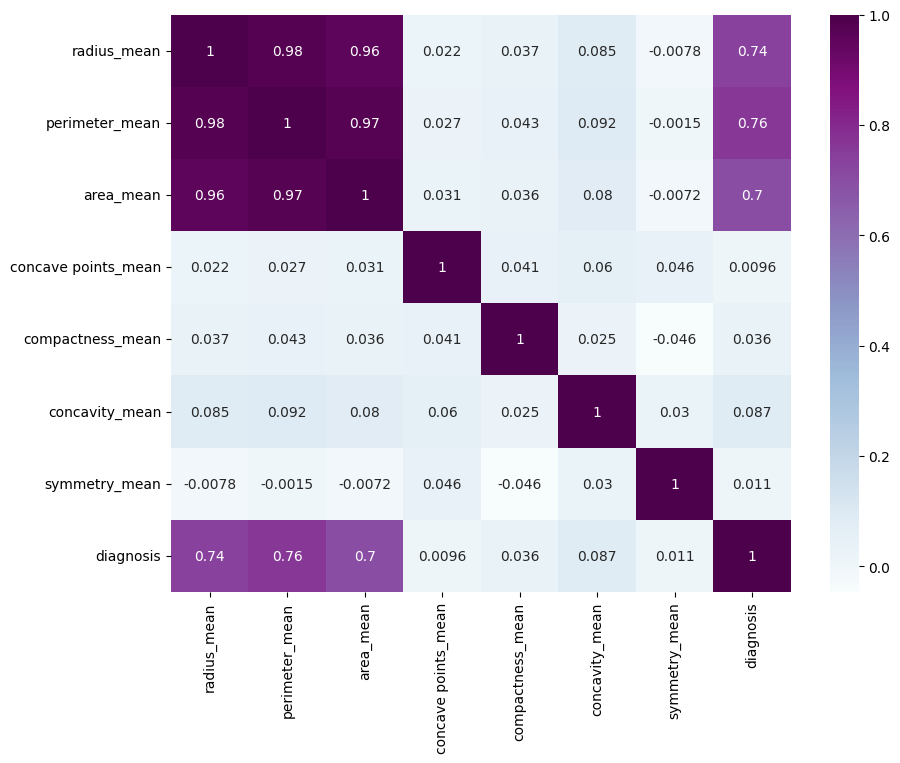

In [ ]:
#finding correlation between the features
import seaborn as sns
import matplotlib.pyplot as plt
corr_var=dataset.corr(numeric_only=True) # added numeric_only=True
print(corr_var)
plt.figure(figsize=(10,7.5)) #matplotlib.pyplot is now imported as plt
sns.heatmap(corr_var, annot=True, cmap='BuPu') #seaborn is now imported as sns
plt.show()



In [ ]:
#as there is no importance in cust id, row no and sur name for modelling we are not included here in independent feature
X = dataset.iloc[:, 3:-1].values
#target value
y = dataset.iloc[:, -1].values

In [ ]:
#independent features
print(X)

[[ 0.04781     0.08129     0.06664     0.1885    ]
 [ 0.0311      0.127       0.04568     0.1967    ]
 [ 0.02076     0.06492     0.02956     0.1815    ]
 ...
 [ 0.12185712  0.09232006  0.66412397  1.27424656]
 [-0.464384    0.97861454  0.10172341  1.54593135]
 [-1.46305631  2.27398087  0.36027753  0.02436725]]


In [ ]:
#dependent features
print(y)

[0 0 0 ... 1 1 1]


In [ ]:
#as we have two columns as categorical terms we go for encoding we need to convert to numericals
#Categorical encoding

#gender will have some correlation with other feature so we go for label encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
#gender column in index 2
X[:, 2] = le.fit_transform(X[:, 2])

In [ ]:
print(X)

[[ 4.78100000e-02  8.12900000e-02  8.10000000e+02  1.88500000e-01]
 [ 3.11000000e-02  1.27000000e-01  7.33000000e+02  1.96700000e-01]
 [ 2.07600000e-02  6.49200000e-02  6.38000000e+02  1.81500000e-01]
 ...
 [ 1.21857125e-01  9.23200570e-02  1.33600000e+03  1.27424656e+00]
 [-4.64384001e-01  9.78614544e-01  9.01000000e+02  1.54593135e+00]
 [-1.46305631e+00  2.27398087e+00  1.19500000e+03  2.43672530e-02]]


In [ ]:
#country name wont be that much correlation added it has more than 2 names so go for one hot encoding
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
#country name is present in 1st index value
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [ ]:
print(X)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 6814 stored elements and shape (1707, 1678)>
  Coords	Values
  (0, 789)	1.0
  (0, 1675)	0.04781
  (0, 1676)	810.0
  (0, 1677)	0.1885
  (1, 973)	1.0
  (1, 1675)	0.0311
  (1, 1676)	733.0
  (1, 1677)	0.1967
  (2, 687)	1.0
  (2, 1675)	0.02076
  (2, 1676)	638.0
  (2, 1677)	0.1815
  (3, 551)	1.0
  (3, 1675)	0.02923
  (3, 1676)	613.0
  (3, 1677)	0.1467
  (4, 655)	1.0
  (4, 1675)	0.005917
  (4, 1676)	562.0
  (4, 1677)	0.1769
  (5, 834)	1.0
  (5, 1675)	0.02749
  (5, 1676)	806.0
  (5, 1677)	0.1675
  (6, 763)	1.0
  :	:
  (1700, 1677)	-0.126982514
  (1701, 16)	1.0
  (1701, 1675)	-0.565358352
  (1701, 1676)	53.0
  (1701, 1677)	0.488308914
  (1702, 1429)	1.0
  (1702, 1675)	0.665088449
  (1702, 1676)	433.0
  (1702, 1677)	-0.934822873
  (1703, 1673)	1.0
  (1703, 1675)	0.052068348
  (1703, 1676)	1653.0
  (1703, 1677)	-0.130639627
  (1704, 841)	1.0
  (1704, 1675)	0.121857125
  (1704, 1676)	1336.0
  (1704, 1677)	1.274246558
  (1705, 1454)	1.0


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split

# 1) If X was accidentally wrapped as a zero‑dim np.ndarray, unwrap it:
if isinstance(X, np.ndarray) and X.ndim == 0:
    X = X.item()

# 2) If X is a sparse matrix, convert it to dense:
if hasattr(X, "toarray"):
    X = X.toarray()

# 3) Ensure y is a flat 1‑D array:
y = np.array(y).ravel()

# 4) Now safely split:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0
)


In [ ]:
#feature scaling is an important and mandatory for ann process before modelling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:

#ANN - initializing
ann = tf.keras.models.Sequential()

In [ ]:

#input layer
# 6 features
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

In [ ]:

#hidden layer
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

In [ ]:

#output layer
#as target value is binary - AF
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [ ]:
#compiling
#loss - target is binary
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])


In [ ]:
#training set
ann.fit(X_train, y_train, batch_size = 32, epochs = 50)

Epoch 1/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.3923 - loss: 1.0701
Epoch 2/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4769 - loss: 0.7379
Epoch 3/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6954 - loss: 0.6295
Epoch 4/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8385 - loss: 0.5568
Epoch 5/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8881 - loss: 0.4954
Epoch 6/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9170 - loss: 0.4162
Epoch 7/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9522 - loss: 0.3365
Epoch 8/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9707 - loss: 0.2550
Epoch 9/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9840 - loss: 0.1918
Epoch 10/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9818 - loss: 0.1563
Epoch 11/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9914 - loss: 0.1240
Epoch 12/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9851 - lo

In [ ]:

#test result - prediction
y_pred = ann.predict(X_test)
#insted of values we ll get 0 or 1
y_pred = (y_pred > 0.5)
#actual vs prediicted outputs
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
[[0 1]
 [0 0]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


In [ ]:
#accuracy and confusion matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[327   5]
 [176   5]]


0.6471734892787524

In [ ]:
import pandas as pd

df = pd.read_csv('/content/simplified_dataset.csv')  # Replace with your file path


In [ ]:
# 1) How many features does the model expect?
n_features = X_train.shape[1]  # e.g. 16

# 2) Your 12‑value raw sample
raw_sample = [1, 0, 0, 750, 0, 48, 53, 62500, 3, 1, 1, 80000]

# 3) Pad with zeros up to n_features
#    (so raw_sample → length n_features)
if len(raw_sample) < n_features:
    raw_sample = raw_sample + [0] * (n_features - len(raw_sample))
elif len(raw_sample) > n_features:
    raise ValueError(f"Sample has {len(raw_sample)} values but model expects {n_features} features")

# 4) Scale using your trained scaler
scaled_sample = sc.transform([raw_sample])  # shape (1, n_features)

# 5) Predict with your trained ANN
pred_prob = ann.predict(scaled_sample)[0][0]
pred_label = pred_prob > 0.5

print(f"Probability of class 1: {pred_prob:.4f}")
print("Predicted label 1?" , pred_label)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Probability of class 1: 1.0000
Predicted label 1? True


In [ ]:
# 1) Evaluate the model on test data
loss, accuracy = ann.evaluate(X_test, y_test)

# 2) Print the final loss and accuracy
print(f"Final Loss: {loss:.4f}")
print(f"Final Accuracy: {accuracy * 100:.2f}%")


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6589 - loss: 2.4180  
Final Loss: 2.5078
Final Accuracy: 64.72%


In [ ]:
!pip install geneticalgorithm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for func-timeout: filename=func_timeout-4.3.5-py3-none-any.whl size=15077 sha256=f28f57765875a916491e3cf26f51f404feb121c3cf865dcfad3b818bb2c5a6e7
  Stored in directory: /root/.cache/pip/wheels/07/e6/86/f23164d12c3134966614102db8e7956ab359faf7ffd78703ce
Successfully built func-timeout


In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv("/content/simplified_dataset.csv")

# Print the column names and the first few rows
print("Column Names:", df.columns)
print("First Few Rows:\n", df.head())


Column Names: Index(['radius_mean', 'perimeter_mean', 'area_mean', 'concave points_mean',
       'compactness_mean', 'concavity_mean', 'symmetry_mean', 'diagnosis'],
      dtype='object')
First Few Rows:
    radius_mean  perimeter_mean  area_mean  concave points_mean  \
0       13.540           87.46      566.3             0.047810   
1       13.080           85.63      520.0             0.031100   
2        9.504           60.34      273.9             0.020760   
3       13.030           82.61      523.8             0.029230   
4        8.196           51.71      201.9             0.005917   

   compactness_mean  concavity_mean  symmetry_mean  diagnosis  
0           0.08129         0.06664         0.1885          0  
1           0.12700         0.04568         0.1967          0  
2           0.06492         0.02956         0.1815          0  
3           0.03766         0.02562         0.1467          0  
4           0.05943         0.01588         0.1769          0  


In [ ]:
!pip install deap tensorflow


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 2.7 MB/s eta 0:00:00


In [ ]:
!pip install keras-tuner


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 2.9 MB/s eta 0:00:00


In [ ]:
def mutate(individual):
    # Apply Gaussian mutation to the hyperparameters
    num_neurons_1, num_neurons_2, learning_rate, dropout_rate = individual

    # Mutate the dropout rate and ensure it's between 0 and 1
    dropout_rate = np.clip(np.random.normal(dropout_rate, 0.1), 0.0, 1.0)

    # Reassign the mutated dropout rate
    individual[3] = dropout_rate

    return individual,


TensorFlow (import tensorflow as tf)
Purpose: Core machine learning framework.
5. DEAP (Distributed Evolutionary Algorithms in Python):Running the genetic algorithm

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from deap import base, creator, tools, algorithms
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load your dataset
df = pd.read_csv("/content/simplified_dataset.csv")  # Adjust path if needed

# Extract features (X) and target (y)
X = df.drop(columns=['diagnosis'])  # Replace 'diagnosis' with your target column name if different
y = df['diagnosis']

# Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# === Step 1: Define the Neural Network Model ===
def build_model(num_neurons_1, num_neurons_2, learning_rate, dropout_rate):
    model = Sequential()
    model.add(Dense(num_neurons_1, activation='relu', input_shape=(X_train.shape[1],)))  # Corrected here
    model.add(Dense(num_neurons_2, activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1, activation='sigmoid'))  # Binary classification

    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

    return model

# === Step 2: Set up DEAP's Genetic Algorithm ===
# Create the 'Individual' and 'Fitness' classes
creator.create("FitnessMax", base.Fitness, weights=(1.0,))  # Maximize fitness (accuracy)
creator.create("Individual", list, fitness=creator.FitnessMax)

# Define the individual and population generation functions
def create_individual():
    # Randomly generate values for hyperparameters
    num_neurons_1 = np.random.randint(64, 512)  # Number of neurons in the first hidden layer
    num_neurons_2 = np.random.randint(64, 512)  # Number of neurons in the second hidden layer
    learning_rate = np.random.uniform(1e-5, 1e-2)  # Learning rate
    dropout_rate = np.random.uniform(0.0, 0.5)  # Dropout rate

    return creator.Individual([num_neurons_1, num_neurons_2, learning_rate, dropout_rate])

# === Step 3: Define the Mutation Function ===
def mutate(individual):
    # Apply Gaussian mutation to the hyperparameters
    num_neurons_1, num_neurons_2, learning_rate, dropout_rate = individual

    # Mutate the dropout rate and ensure it's between 0 and 1
    dropout_rate = np.clip(np.random.normal(dropout_rate, 0.1), 0.0, 1.0)

    # Reassign the mutated dropout rate
    individual[3] = dropout_rate

    return individual,

# === Step 4: Define the Evaluation Function ===
def evaluate(individual):
    # Extract hyperparameters
    num_neurons_1, num_neurons_2, learning_rate, dropout_rate = individual

    # Build and compile the model with current hyperparameters
    model = build_model(num_neurons_1, num_neurons_2, learning_rate, dropout_rate)

    # Train the model with fewer epochs for quicker evaluation
    model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0, validation_data=(X_val, y_val))

    # Evaluate the model's accuracy on the validation set
    loss, accuracy = model.evaluate(X_val, y_val, verbose=0)

    return (accuracy,)

# === Step 5: Set up the Genetic Algorithm ===
toolbox = base.Toolbox()

# Create individuals
toolbox.register("individual", tools.initIterate, creator.Individual, create_individual)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

# Register the evaluation function
toolbox.register("evaluate", evaluate)

# Register the selection function (tournament selection)
toolbox.register("select", tools.selTournament, tournsize=3)

# Register the crossover function (uniform crossover)
toolbox.register("mate", tools.cxUniform, indpb=0.5)

# Register the mutation function (Gaussian mutation)
toolbox.register("mutate", mutate)

# === Step 6: Run the Genetic Algorithm ===
population = toolbox.population(n=5)  # Reduced population size for faster testing

# Run the genetic algorithm with fewer generations
result = algorithms.eaSimple(population, toolbox, cxpb=0.7, mutpb=0.2, ngen=5, verbose=True)  # Reduced generations

# Extract the best individual from the final population
best_individual = tools.selBest(population, 1)[0]
print("Best Individual (Hyperparameters):", best_individual)

# Extract the hyperparameters
best_num_neurons_1, best_num_neurons_2, best_learning_rate, best_dropout_rate = best_individual

# Build the best model
best_model = build_model(best_num_neurons_1, best_num_neurons_2, best_learning_rate, best_dropout_rate)

# Train the model with the best hyperparameters
best_model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1, validation_data=(X_val, y_val))

# Evaluate the model on the validation set
loss, accuracy = best_model.evaluate(X_val, y_val)
print(f"Best Model - Loss: {loss}, Accuracy: {accuracy}")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


gen	nevals
0  	5     
1  	4     
2  	2     
3  	4     
4  	5     
5  	2     
Best Individual (Hyperparameters): [302, 400, 0.0072702384733103, 0.0461987460485464]
Epoch 1/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.8279 - loss: 0.3335 - val_accuracy: 0.8801 - val_loss: 0.2647
Epoch 2/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9185 - loss: 0.2035 - val_accuracy: 0.9181 - val_loss: 0.1838
Epoch 3/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9491 - loss: 0.1555 - val_accuracy: 0.9298 - val_loss: 0.1661
Epoch 4/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9435 - loss: 0.1469 - val_accuracy: 0.9269 - val_loss: 0.1703
Epoch 5/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9465 - loss: 0.1494 - val_accuracy: 0.9474 - val_loss: 0.1319
Epoch 6/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9650 - loss: 0.0928 - val_accuracy: 0.9327 - val_loss: 0.1543
Epoch 7/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9575 - loss: 0

In [ ]:
# Define statistics to be collected (mean, std, min, max)
stats = tools.Statistics(lambda ind: ind.fitness.values[0])
stats.register("avg", np.mean)
stats.register("std", np.std)
stats.register("min", np.min)
stats.register("max", np.max)


In [ ]:
# Run the GA with stats tracking
result = algorithms.eaSimple(population, toolbox, cxpb=0.7, mutpb=0.2, ngen=5,
                             stats=stats, verbose=True)


gen	nevals	avg     	std      	min    	max     
0  	0     	0.954386	0.0077582	0.94152	0.961988
1  	2     	0.961988	0        	0.961988	0.961988
2  	2     	0.952632	0.0172886	0.918129	0.961988
3  	3     	0.956725	0.00651202	0.944444	0.961988
4  	0     	0.960234	0.00143247	0.959064	0.961988
5  	4     	0.952632	0.00894565	0.935673	0.961988


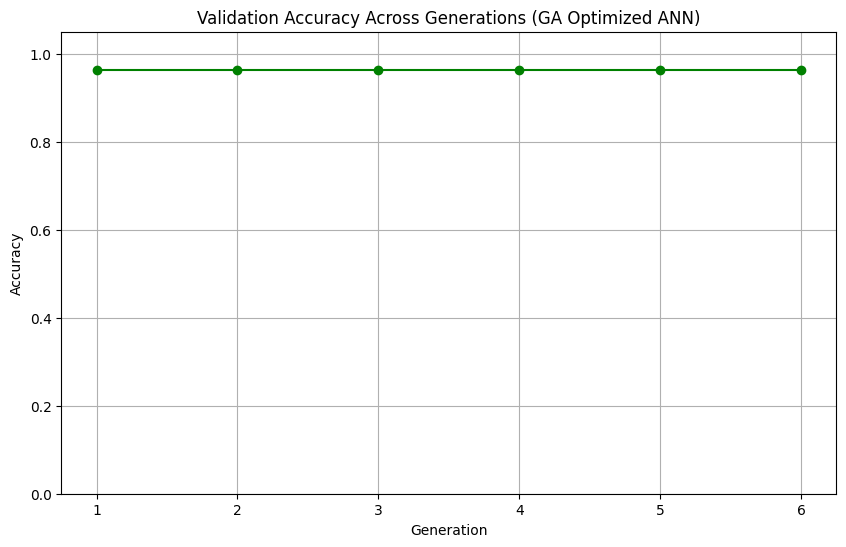

In [ ]:
# Extract logbook from result
_, logbook = result

# Extract the 'max' accuracy per generation
accuracies = logbook.select('max')

# Plot the accuracy over generations
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(accuracies) + 1), accuracies, marker='o', linestyle='-', color='green')
plt.title('Validation Accuracy Across Generations (GA Optimized ANN)')
plt.xlabel('Generation')
plt.ylabel('Accuracy')
plt.ylim(0, 1.05)
plt.grid(True)
plt.show()
